In [1]:
# Importing OpenCV Library for basic image processing functions
import cv2
# Numpy for array related functions
import numpy as np
# Dlib for deep learning based Modules and face landmark detection
import dlib
# face_utils for basic operations of conversion
from imutils import face_utils
# playsound for playing audio
from playsound import playsound

import matplotlib.pyplot as plt

In [2]:
# Initializing the sample video
cap = cv2.VideoCapture("/home/varnana/Project1/sample.mp4")
# Define the desired frame width and height
frame_width = 720
frame_height = 480

In [3]:

# Initializing the face detector and landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/home/varnana/Project1/shape_predictor_68_face_landmarks.dat")

In [4]:
# status marking for current state
sleep = 0
drowsy = 0
active = 0
status = ""
color = (0, 0, 0)

In [5]:
# Path to the sound file
sound_file = '/home/varnana/Project1/BuzzerWav.wav'
sound_file2 = '/home/varnana/Project1/Wake_up.wav'

In [6]:
def compute(ptA, ptB):
    dist = np.linalg.norm(ptA - ptB)
    return dist

In [7]:
def blinked(a, b, c, d, e, f):
    up = compute(b, d) + compute(c, e)
    down = compute(a, f)
    ratio = up / (2.0 * down)

    # Checking if it is blinked
    if ratio > 0.25:
        return 2
    elif ratio > 0.21 and ratio <= 0.25:
        return 1
    else:
        return 0

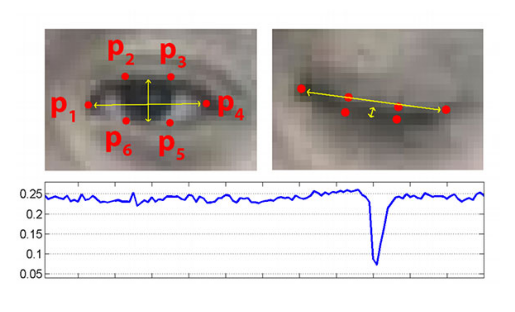

In [8]:
image = cv2.imread("/home/varnana/Project1/eye3.jpg")

# Convert BGR to RGB
image2_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image2_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [9]:
while True:
    _, frame = cap.read()
    # Resize the frame to the desired width and height
    frame = cv2.resize(frame, (frame_width, frame_height))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    # detected face in faces array
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        face_frame = frame.copy()
        cv2.rectangle(face_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        # The numbers are actually the landmarks which will show eye
        left_blink = blinked(landmarks[36], landmarks[37],
                             landmarks[38], landmarks[41], landmarks[40], landmarks[39])
        right_blink = blinked(landmarks[42], landmarks[43],
                              landmarks[44], landmarks[47], landmarks[46], landmarks[45])

        # Now judge what to do for the eye blinks
        if left_blink == 0 or right_blink == 0:
            sleep += 1
            drowsy = 0
            active = 0
            if sleep > 6:
                status = "SLEEPING DETECTED !!!"
                color = (255, 0, 0)
                playsound(sound_file)  # Play sound
                playsound(sound_file2) 
        elif left_blink == 1 or right_blink == 1:
            sleep = 0
            active = 0
            drowsy += 1
            if drowsy > 6:
                status = "Drowsy !"
                color = (0, 0, 255)

        else:
            drowsy = 0
            sleep = 0
            active += 1
            if active > 6:
                status = "Active :)"
                color = (0, 255, 0)

        cv2.putText(frame, status, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 3)

        for n in range(0, 68):
            (x, y) = landmarks[n]
            cv2.circle(face_frame, (x, y), 1, (255, 255, 255), -1)

        cv2.imshow("Result of detector", face_frame)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


: 